In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv(r"Data-set/pollution-ds-cleaned.csv")

In [6]:
data.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303


In [7]:
data.shape

(4158, 9)

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
scaler = StandardScaler()

In [11]:
data_scaled = scaler.fit_transform(data) 

In [12]:
data_scaled

array([[ 0.20852808, -0.57242376, -0.68437617, ...,  0.85236961,
        -0.79046017, -1.07960573],
       [-0.05751734,  0.5575056 , -0.92415073, ...,  0.6636463 ,
        -0.87820311,  1.00823835],
       [-0.9798081 ,  0.49587309,  1.09326276, ...,  0.64005589,
        -1.11218427,  1.06543956],
       ...,
       [-0.09299006,  2.0161417 , -0.54381868, ...,  0.42774218,
        -0.96594605,  1.70895314],
       [-0.48319   ,  0.73555508,  0.05975175, ...,  0.64005589,
         0.17471213, -0.65059667],
       [-0.58960816, -1.57908811,  0.65505409, ..., -1.10563464,
         0.75966503, -1.6373175 ]], shape=(4158, 9))

In [13]:
from sklearn.decomposition import PCA

In [15]:
pca = PCA(n_components = 2,random_state=42)

In [20]:
data_pca = pca.fit_transform(data_scaled)

In [21]:
data_pca

array([[-0.20540077, -0.56474786],
       [ 1.00101829, -1.67076022],
       [ 1.59471085,  0.8255071 ],
       ...,
       [ 1.73221811, -1.07604462],
       [ 0.51714725, -0.14989758],
       [-1.79712157,  1.66299004]], shape=(4158, 2))

In [23]:
data["PCA1"] = data_pca[:,0]
data["PCA2"] = data_pca[:,1]

In [24]:
data.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,PCA1,PCA2
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,-0.205401,-0.564748
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,1.001018,-1.670760
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,1.594711,0.825507
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,-2.156080,-0.412464
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,-1.742370,-0.053360


<Axes: xlabel='PCA1', ylabel='PCA2'>

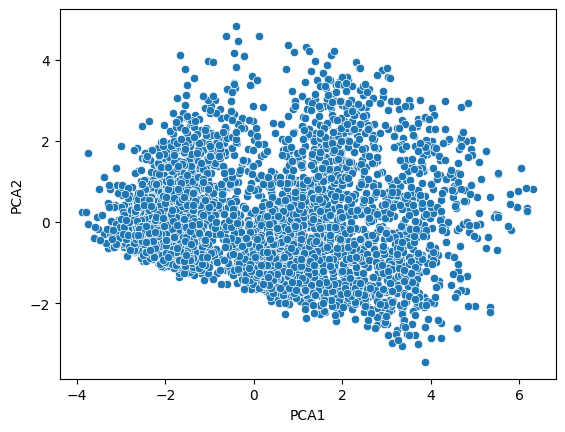

In [25]:
sns.scatterplot(x="PCA1",y="PCA2",data=data)

In [28]:
from sklearn.cluster import KMeans

In [31]:
inertia = []

In [34]:
for i in range(2,11):
    km = KMeans( n_clusters = i ,random_state = 42 )
    km.fit(data_scaled)
    inertia.append( km.inertia_ )

In [35]:
inertia

[23132.86637912877,
 19814.057813575117,
 17728.174571764866,
 16476.64409671395,
 15757.416302185793,
 15026.132333395566,
 14857.89230235394,
 14269.403516494316,
 13847.530520620245]

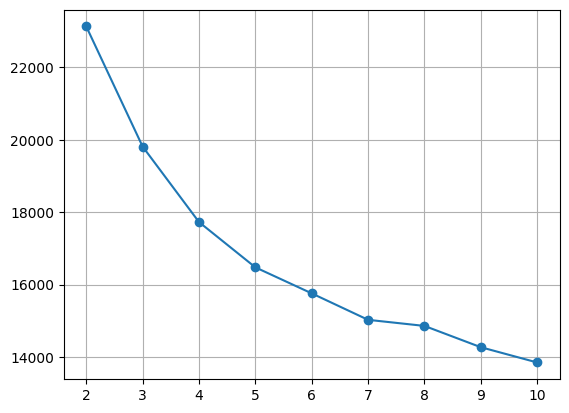

In [37]:
plt.plot(range(2,11),inertia,marker ="o")
plt.grid()

In [38]:
km = KMeans(n_clusters = 4,random_state = 42)

In [40]:
km.fit_transform(data_scaled)

array([[3.7398904 , 4.13970174, 1.98356024, 2.72249575],
       [3.86270329, 2.84647459, 1.32588914, 3.53749631],
       [2.11727231, 3.06745259, 2.49997079, 4.06400609],
       ...,
       [3.72356406, 2.81975666, 2.4162628 , 4.37097121],
       [3.1057085 , 3.42244678, 2.00746707, 3.0507381 ],
       [3.82540322, 5.89510821, 3.83688948, 2.24408487]], shape=(4158, 4))

In [41]:
data["cluster"] = km.fit_predict(data_scaled)

<Axes: xlabel='PCA1', ylabel='PCA2'>

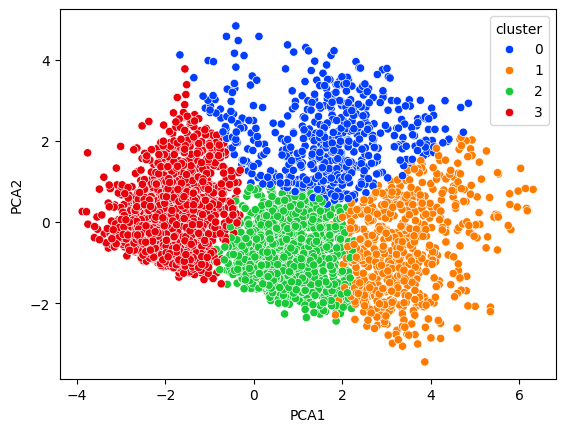

In [42]:
sns.scatterplot(x="PCA1",y="PCA2",data=data,palette="bright",hue="cluster")

In [44]:
cluster0 = data[data["cluster"]==0]
cluster1 = data[data["cluster"]==1]
cluster2 = data[data["cluster"]==2]
cluster3 = data[data["cluster"]==3]